# CS445: Computational Photography
## Programming Project 4: Image-Based Lighting


## Recovering HDR Radiance Maps 

Load libraries and data

In [4]:
# jupyter extension that allows reloading functions from imports without clearing kernel :D
%load_ext autoreload
%autoreload 2

In [2]:
# System imports
from os import path
import math

# Third-Party Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# modify to where you store your project data including utils
datadir = "/Users/lorna/master2/cs445/proj4/" 

utilfn = datadir + "utils"
!cp -r "$utilfn" .
samplesfn = datadir + "samples"
!cp -r "$samplesfn" .

# can change this to your output directory of choice
!mkdir "images"
!mkdir "images/outputs"

# import starter code
import utils
from utils.io import read_image, write_image, read_hdr_image, write_hdr_image
from utils.display import display_images_linear_rescale, rescale_images_linear
from utils.hdr_helpers import gsolve
from utils.hdr_helpers import get_equirectangular_image
from utils.bilateral_filter import bilateral_filter



cp: ./utils and /Users/lorna/master2/cs445/proj4/utils are identical (not copied).
cp: ./samples and /Users/lorna/master2/cs445/proj4/samples are identical (not copied).
mkdir: images: File exists
mkdir: images/outputs: File exists


### Reading LDR images

You can use the provided samples or your own images.  You get more points for using your own images, but it might help to get things working first with the provided samples.

In [67]:
# TODO: Replace this with your path and files

imdir = 'samples'
imfns = ['011.png', '021.png', '031.png', '041.png', '051.png']
exposures = [1/38.0, 1/45.0, 1/60.0, 1/100.0, 1/200.0]
exposures = np.array(exposures, dtype=np.float32)
naive_hdr_image, naive_log_irradiances = make_hdr_naive(ldr_images, exposures)
ldr_images = []
for f in np.arange(len(imfns)):
  im = read_image(imdir + '/' + imfns[f])
  if f==0:
    imsize = int((im.shape[0] + im.shape[1])/2) # set width/height of ball images
    ldr_images = np.zeros((len(imfns), imsize, imsize, 3))
    ldr_images[f] = cv2.resize(im, (imsize, imsize))

background_image_file = imdir + '/' + 'empty.jpg'
background_image = read_image(background_image_file)



### Naive LDR merging 

Compute the HDR image as average of irradiance estimates from LDR images

In [70]:
def make_hdr_naive(ldr_images: np.ndarray, exposures: list) -> (np.ndarray, np.ndarray):
    '''
    Makes HDR image using multiple LDR images, and its corresponding exposure values.
    
    The steps to implement:
    1) Divide each image by its exposure time.
        - This will rescale images as if it has been exposed for 1 second.
    
    2) Return average of above images
    
    
    For further explanation, please refer to problem page for how to do it.
      
    Args:
        ldr_images(np.ndarray): N x H x W x 3  shaped numpy array representing
            N ldr images with width W, height H, and channel size of 3 (RGB)
        exposures(list): list of length N, representing exposures of each images.
            Each exposure should correspond to LDR images' exposure value.
    Return:
        (np.ndarray): H x W x 3 shaped numpy array representing HDR image merged using
            naive ldr merging implementation.
        (np.ndarray): N x H x W x 3  shaped numpy array represending log irradiances
            for each exposures
            
    '''
    N, H, W, C = ldr_images.shape
    # sanity check
    assert N == len(exposures)
  
    # TO DO
  
    return hdr_image, log_irradiances



In [72]:
def display_hdr_image(im_hdr):
    '''
    Maps the HDR intensities into a 0 to 1 range and then displays. 
    Three suggestions to try: 
      (1) Take log and then linearly map to 0 to 1 range (see display.py for example) 
      (2) img_out = im_hdr / (1 + im_hdr)
      (3) HDR display code in a python package 
    '''

    # TO DO


HDR Image


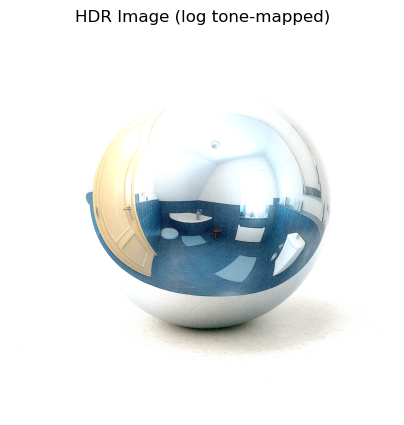

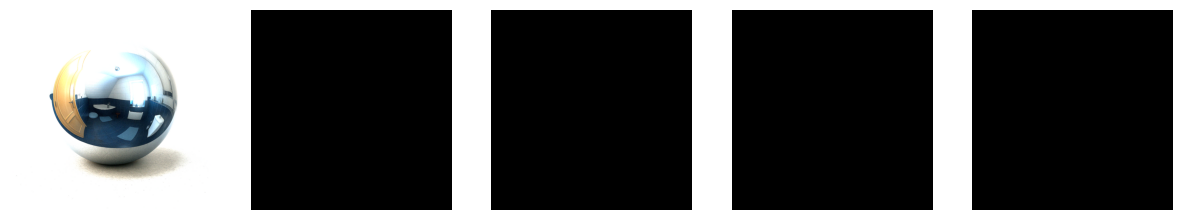

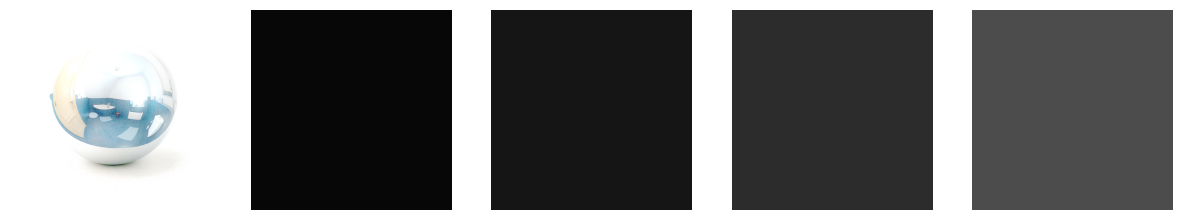

In [61]:

# get HDR image, log irradiance
naive_hdr_image, naive_log_irradiances = make_hdr_naive(ldr_images, exposures)

# write HDR image to directory
write_hdr_image(naive_hdr_image, 'images/outputs/naive_hdr.hdr')

# display HDR image
print('HDR Image')
display_hdr_image(naive_hdr_image)

# display original images (code provided in utils.display)
display_images_linear_rescale(ldr_images)

# display log irradiance image (code provided in utils.display)
display_images_linear_rescale(naive_log_irradiances)


In [15]:
# jupyter extension that allows reloading functions from imports without clearing kernel :D
%load_ext autoreload
%autoreload 2

# System imports
from os import path
import math

# Third-Party Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from pathlib import Path

# 修改為你存放 project data (包含 utils 與 samples) 的路徑
datadir = "/Users/lorna/master2/cs445/proj4/" 

utilfn = datadir + "utils"
!cp -r "$utilfn" .
samplesfn = datadir + "samples"
!cp -r "$samplesfn" .

# 建立輸出目錄
!mkdir -p "images/outputs"

# import starter code
import utils
from utils.io import read_image, write_image, read_hdr_image, write_hdr_image
from utils.display import display_images_linear_rescale, rescale_images_linear
from utils.hdr_helpers import gsolve
from utils.hdr_helpers import get_equirectangular_image
from utils.bilateral_filter import bilateral_filter

# ----------------------------
# 讀取 LDR 圖片 (samples 裡的圖片)
# ----------------------------
imdir = 'samples'
imfns = ['011.png', '021.png', '031.png', '041.png', '051.png']
# 定義曝光值 (這裡你指定的曝光)
exposures = [1/38.0, 1/45.0, 1/60.0, 1/100.0, 1/200.0]
exposures = np.array(exposures, dtype=np.float32)

# 讀取圖片，並將尺寸統一（以第一張圖的寬高平均來 resize）
ldr_images = []
for f in range(len(imfns)):
    im = read_image(path.join(imdir, imfns[f]))  # 此函數應返回 [0,1] 之間的 RGB 圖
    if f == 0:
        imsize = int((im.shape[0] + im.shape[1]) / 2)
        ldr_images = np.zeros((len(imfns), imsize, imsize, 3), dtype=np.float32)
    ldr_images[f] = cv2.resize(im, (imsize, imsize))
    
# 讀取背景圖（供後續使用）
background_image_file = path.join(imdir, 'empty.jpg')
background_image = read_image(background_image_file)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cp: ./utils and /Users/lorna/master2/cs445/proj4/utils are identical (not copied).
cp: ./samples and /Users/lorna/master2/cs445/proj4/samples are identical (not copied).


HDR Image:


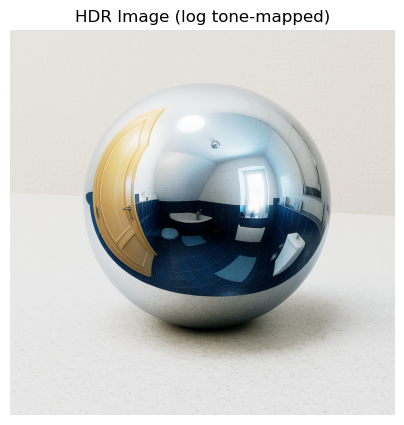

原始 LDR 圖:
Log Irradiance 可視化:


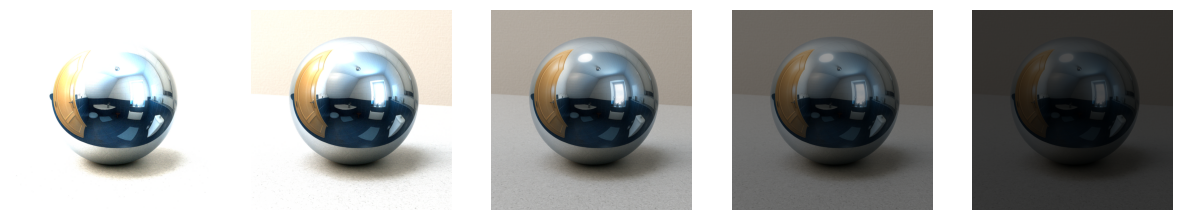

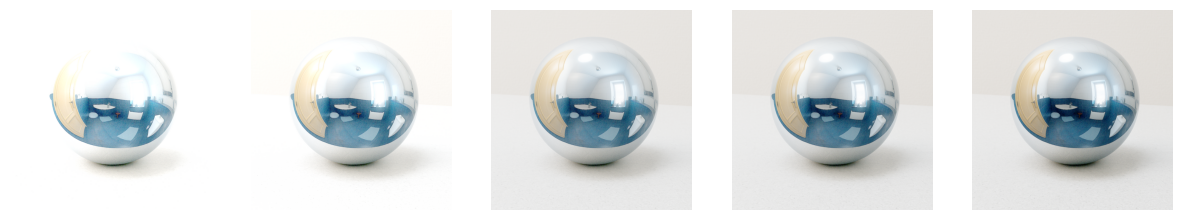

In [17]:
# ----------------------------
# 定義 Naive HDR 合成函數
# ----------------------------
def make_hdr_naive(ldr_images: np.ndarray, exposures: list) -> (np.ndarray, np.ndarray):
    '''
    利用多張 LDR 圖片與相對曝光值進行 naive HDR 合成，並回傳 HDR 圖像與每張 log irradiance 的可視化。
    
    步驟:
      1) 將每張圖片轉換回原始亮度 (ldr_images 為 [0,1]，先轉到 [0,255])
      2) 注意 LDR 圖通常為 Gamma 編碼，要解碼到 linear 空間：即 ldr_linear = ldr_images**gamma
      3) 每張圖片除以其曝光時間，得到 irradiance map
      4) 使用 log(1 + irradiance) 來計算 log irradiance，並針對每張圖片獨立正規化以便可視化
      5) HDR 圖像 = 多張 irradiance map 的平均值，再 normalize 回 [0,1]
      
    回傳:
       hdr_image: H x W x 3 float32 HDR 圖，範圍 [0,1]
       log_irradiances_vis: N x H x W x 3，每張圖片獨立正規化後的 log irradiance 可視化結果
    '''
    N, H, W, C = ldr_images.shape
    assert N == len(exposures)
    
    gamma = 2.2
    # gamma 解碼：轉成 linear 空間
    ldr_linear = ldr_images ** gamma
    # 轉回 [0,255]
    ldr_scaled = ldr_linear * 255.0

    irradiance = np.zeros_like(ldr_scaled)
    log_irradiances_vis = np.zeros_like(ldr_scaled)

    for i in range(N):
        # 得到每張圖的 irradiance map: 注意：曝光除法
        irradiance[i] = ldr_scaled[i] / exposures[i]
        
        # 使用 log(1 + irradiance) 避免 log(0)
        log_img = np.log1p(irradiance[i])
        # 對每張圖片獨立正規化
        mini = np.min(log_img)
        maxi = np.max(log_img)
        log_img_norm = (log_img - mini) / (maxi - mini + 1e-6)
        log_irradiances_vis[i] = log_img_norm

    # HDR 圖像：平均每張圖的 irradiance，然後 normalize 回 [0,1]
    hdr_image = np.mean(irradiance, axis=0) / 255.0
    return hdr_image, log_irradiances_vis

# ----------------------------
# 定義 HDR 圖像顯示函數 (tone mapping)
# ----------------------------
def display_hdr_image(im_hdr):
    '''
    將 HDR 圖像映射到 0 到 1 區間後顯示。使用 log tone mapping 方法。
    '''
    # 使用 log tone mapping
    im_display = np.log(1 + im_hdr)
    im_display /= np.max(im_display)
    plt.figure(figsize=(5, 5))
    plt.imshow(np.clip(im_display, 0, 1))
    plt.title("HDR Image (log tone-mapped)")
    plt.axis('off')
    plt.show()

# ----------------------------
# 執行 Naive HDR 合成
# ----------------------------
naive_hdr_image, naive_log_irradiances = make_hdr_naive(ldr_images, exposures)

# 儲存 HDR 圖像 (此函數會根據 .hdr 格式寫出)
write_hdr_image(naive_hdr_image, 'images/outputs/naive_hdr.hdr')

# ----------------------------
# 顯示結果
# ----------------------------
print('HDR Image:')
display_hdr_image(naive_hdr_image)

print('原始 LDR 圖:')
display_images_linear_rescale(ldr_images)

print('Log Irradiance 可視化:')
display_images_linear_rescale(naive_log_irradiances)


### Weighted LDR merging 

Compute HDR image as a weighted average of irradiance estimates from LDR images, where weight is based on pixel intensity so that very low/high intensities get less weight


In [19]:
def make_hdr_weighted(ldr_images: np.ndarray, exposure_times: list) -> (np.ndarray, np.ndarray):
    '''
    Makes HDR image using multiple LDR images, and its corresponding exposure values.
    
    The steps to implement:
    1) compute weights for images with based on intensities for each exposures
        - This can be a binary mask to exclude low / high intensity values

    2) Divide each images by its exposure time.
        - This will rescale images as if it has been exposed for 1 second.
    
    3) Return weighted average of above images
    
    
    Args:
        ldr_images(np.ndarray): N x H x W x 3 shaped numpy array representing
            N ldr images with width W, height H, and channel size of 3 (RGB)
        exposure_times(list): list of length N, representing exposures of each images.
            Each exposure should correspond to LDR images' exposure value.
    Return:
        (np.ndarray): H x W x 3 shaped numpy array representing HDR image merged without
            under - over exposed regions

    '''
    N, H, W, C = ldr_images.shape
    # sanity check
    assert N == len(exposure_times)
    
    # TO DO


In [21]:
def make_hdr_weighted(ldr_images: np.ndarray, exposures: list) -> (np.ndarray, np.ndarray):
    '''
    Weighted HDR merging using triangular weight per pixel.
    '''
    N, H, W, C = ldr_images.shape
    assert N == len(exposures)

    gamma = 2.2
    ldr_linear = ldr_images ** gamma
    ldr_scaled = ldr_linear * 255.0

    weights = np.zeros((N, H, W, C), dtype=np.float32)
    for i in range(N):
        z = ldr_images[i]
        w = np.where(z <= 0.5, z, 1.0 - z)
        weights[i] = w

    weighted_sum = np.zeros((H, W, C), dtype=np.float32)
    weight_total = np.zeros((H, W, C), dtype=np.float32)

    for i in range(N):
        irradiance = ldr_scaled[i] / exposures[i]
        weighted_sum += weights[i] * irradiance
        weight_total += weights[i]

    hdr_weighted = weighted_sum / (weight_total + 1e-6)  # avoid division by zero
    hdr_weighted /= 255.0  # normalize to [0,1]
    return hdr_weighted


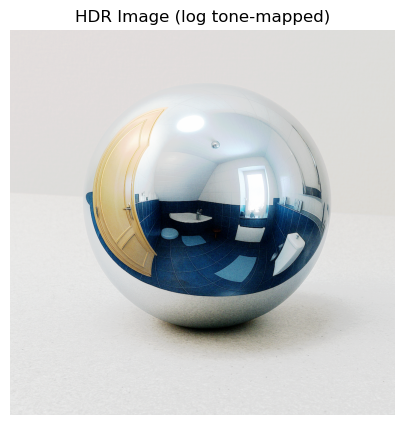

In [23]:
# get HDR image, log irradiance
weighted_hdr_image = make_hdr_weighted(ldr_images, exposures)

# write HDR image to directory
write_hdr_image(weighted_hdr_image, 'images/outputs/weighted_hdr.hdr')

# display HDR image
display_hdr_image(weighted_hdr_image)


Display of difference between naive and weighted for your own inspection

Where does the weighting make a big difference increasing or decreasing the irradiance estimate?  Think about why.

Min ratio =  0.6208487   Max ratio =  2.0304165


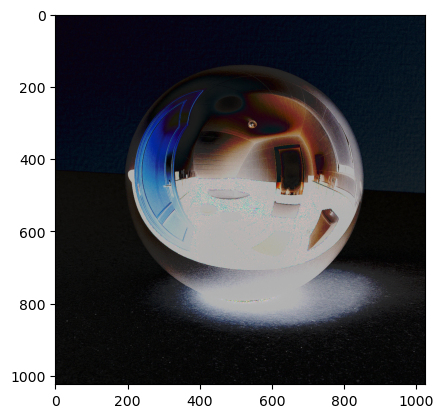

In [26]:
# display difference between naive and weighted 
eps = 1e-8  # avoid log(0)
log_diff_im = np.log(weighted_hdr_image + eps) - np.log(naive_hdr_image + eps)

print('Min ratio = ', np.exp(log_diff_im).min(), '  Max ratio = ', np.exp(log_diff_im).max())
plt.figure()
plt.imshow(rescale_images_linear(log_diff_im))

I observe that the ratio between the weighted and naive HDR results ranges from **0.62 to 2.03**, meaning the weighted approach can either significantly reduce or increase pixel intensity compared to naive merging.

The difference is most prominent in **extremely bright regions**, such as window reflections or light sources. The naive method tends to **over-estimate irradiance** in these regions because overexposed pixels dominate the average. In contrast, the weighted method down-weights saturated values, producing a more reliable and balanced HDR result.

In darker regions, the weighted method also helps by emphasizing well-exposed images, avoiding the under-estimation common in naive averaging.


### LDR merging with camera response function estimation 

Compute HDR after calibrating the photometric reponses to obtain more accurate irradiance estimates from each image

Some suggestions on using <tt>gsolve</tt>:
<ul>
	<li>When providing input to gsolve, don't use all available pixels, otherwise you will likely run out of memory / have very slow run times. To overcome, just randomly sample a set of pixels (1000 or so can suffice), but make sure all pixel locations are the same for each exposure.</li>
	<li>The weighting function w should be implemented using Eq. 4 from the paper (this is the same function that can be used for the previous LDR merging method).</li>
	<li>Try different lambda values for recovering <i>g</i>. Try lambda=1 initially, then solve for <i>g</i> and plot it. It should be smooth and continuously increasing. If lambda is too small, g will be bumpy.</li>
	<li>Refer to Eq. 6 in the paper for using g and combining all of your exposures into a final image. Note that this produces log irradiance values, so make sure to exponentiate the result and save irradiance in linear scale.</li>
</ul>

In [30]:
import numpy as np
from utils.hdr_helpers import gsolve
from utils.io import write_hdr_image
from utils.display import display_images_linear_rescale
import matplotlib.pyplot as plt

# 權重查表：w(z) = z if z <= 127 else 255-z
weights = np.array([z if z <= 127 else 255 - z for z in range(256)], dtype=np.float32)

def make_hdr_estimation(ldr_images: np.ndarray, exposures: list, lm: float):
    N, H, W, C = ldr_images.shape
    assert N == len(exposures)
    ln_t = np.log(np.array(exposures, dtype=np.float32))

    # 隨機 sample P 個像素點（同一組座標套用在所有圖）
    num_samples = 1000
    ys = np.random.randint(0, H, size=num_samples)
    xs = np.random.randint(0, W, size=num_samples)

    g_curves = np.zeros((C, 256), dtype=np.float32)
    log_irradiances = np.zeros((N, H, W, C), dtype=np.float32)
    hdr_lnE = np.zeros((H, W, C), dtype=np.float32)
    weight_sum = np.zeros((H, W, C), dtype=np.float32)

    for ch in range(C):
        # ⚠️ 修正：Z 應為 (P, N)
       Z = np.zeros((N, num_samples), dtype=np.uint8)
       for j in range(N):
                for i, (y, x) in enumerate(zip(ys, xs)):
                    Z[j, i] = np.clip(int(ldr_images[j, y, x, ch] * 255), 0, 255)

       g, _ = gsolve(Z, ln_t, lm, weights)
       g_curves[ch] = g

    for j in range(N):
        for ch in range(C):
            Z_full = np.clip((ldr_images[j, :, :, ch] * 255).astype(np.int32), 0, 255)
            g_z = g_curves[ch][Z_full]
            w = weights[Z_full]
            log_irradiances[j, :, :, ch] = g_z - ln_t[j]
            hdr_lnE[:, :, ch] += w * (g_z - ln_t[j])
            weight_sum[:, :, ch] += w

    hdr_lnE /= (weight_sum + 1e-6)
    hdr_image = np.exp(hdr_lnE) / 255.0
    return hdr_image, log_irradiances, g_curves


Calibrated HDR Image:


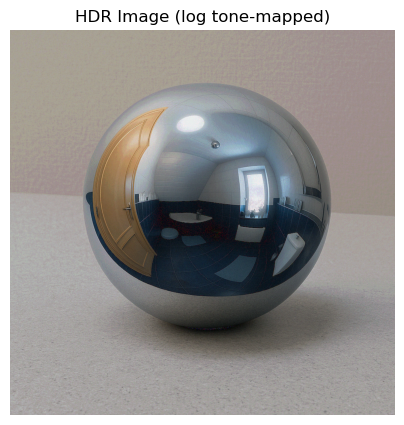

Log irradiance (calibrated):


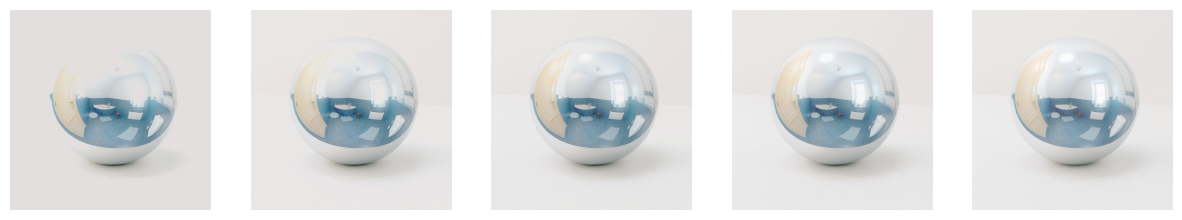

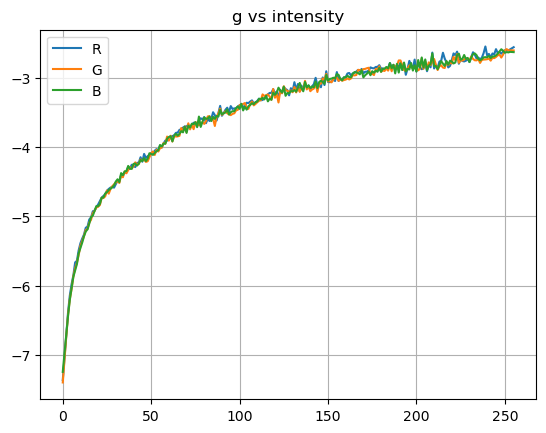

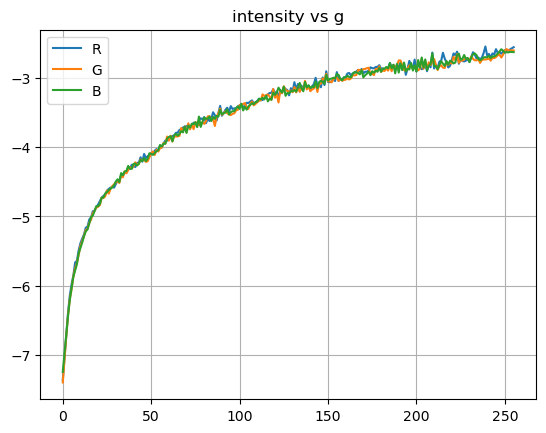

In [32]:
lm = 5.0
calib_hdr_image, calib_log_irradiances, g = make_hdr_estimation(ldr_images, exposures, lm)

# 儲存 HDR
write_hdr_image(calib_hdr_image, 'images/outputs/calib_hdr.hdr')

# 顯示 HDR
print("Calibrated HDR Image:")
display_hdr_image(calib_hdr_image)

# 顯示每張 log irradiance 圖
print("Log irradiance (calibrated):")
display_images_linear_rescale(calib_log_irradiances)

# 顯示 g 曲線圖
labels = ['R', 'G', 'B']
plt.figure()
for n in range(3):
    plt.plot(g[n], label=labels[n])
plt.title("g vs intensity")
plt.legend()
plt.grid(True)

plt.figure()
for n in range(3):
    plt.plot(range(256), g[n], label=labels[n])
plt.title("intensity vs g")
plt.legend()
plt.grid(True)


In [34]:
def make_hdr_estimation(ldr_images: np.ndarray, exposure_times: list, lm)-> (np.ndarray, np.ndarray):
    '''
    Makes HDR image using multiple LDR images, and its corresponding exposure values.
    Please refer to problem notebook for how to do it.
    
    **IMPORTANT**
    The gsolve operations should be ran with:
        Z: int64 array of shape N x P, where N = number of images, P = number of pixels
        B: float32 array of shape N, log shutter times
        l: lambda; float to control amount of smoothing
        w: function that maps from float intensity to weight  
    The steps to implement:
    1) Create random points to sample (from mirror ball region)
    2) For each exposures, compute g values using samples
    3) Recover HDR image using g values
    

    Args:
        ldr_images(np.ndarray): N x H x W x 3 shaped numpy array representing
            N ldr images with width W, height H, and channel size of 3 (RGB)
        exposures(list): list of length N, representing exposures of each images.
            Each exposure should correspond to LDR images' exposure value.
        lm (scalar): the smoothing parameter
    Return:
        (np.ndarray): H x W x 3 shaped numpy array representing HDR image merged using
            gsolve
        (np.ndarray): N x H x W x 3 shaped numpy array represending log irradiances
            for each exposures
        (np.ndarray): 3 x 256 shaped numpy array represending g values of each pixel intensities
            at each channels (used for plotting)
    '''
    N, H, W, C = ldr_images.shape
    # sanity check
    assert N == len(exposure_times)
    
    # TO DO: implement HDR estimation using gsolve
    # gsolve(Z, B, l, w) -> g, lE

   





The following code displays your results. You can copy the resulting images and plots directly into your report where appropriate.

/var/folders/q9/9k2w8bsd34qgsvh9fhyvsdch0000gn/T/ipykernel_39856/1591447747.py:2: RuntimeWarning: divide by zero encountered in log
  log_diff_im = np.log(calib_hdr_image/calib_hdr_image.mean())-np.log(weighted_hdr_image/weighted_hdr_image.mean())


Min ratio =  0.84960866   Max ratio =  inf


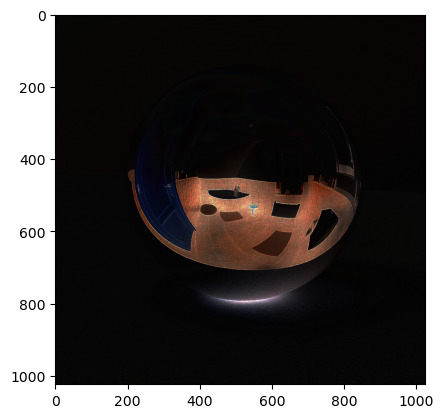

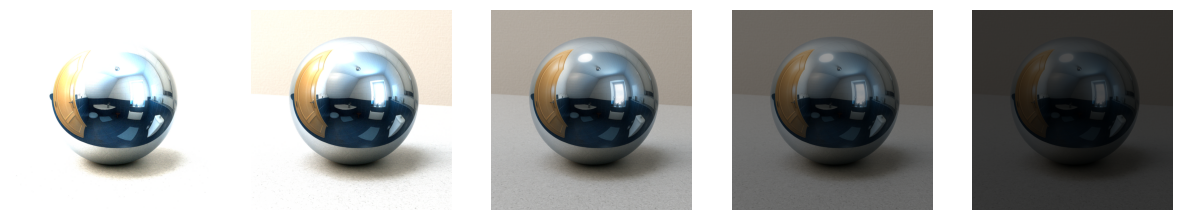

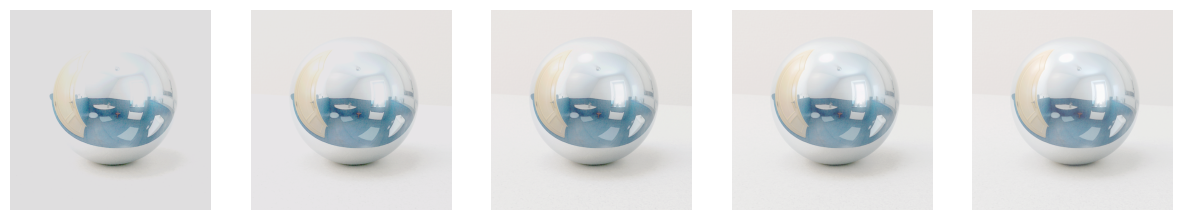

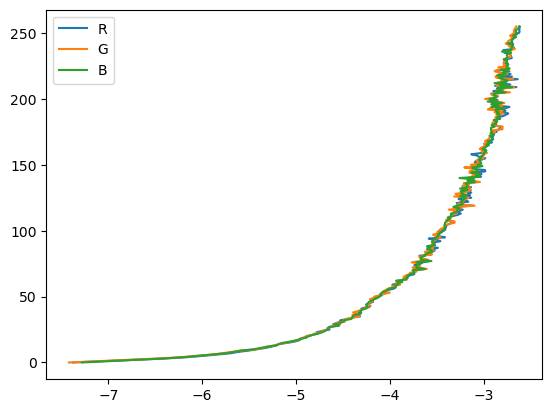

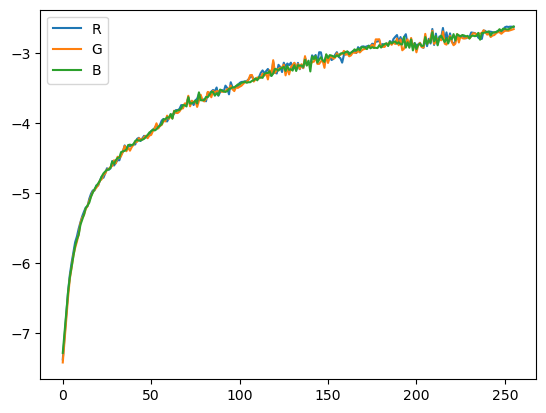

In [143]:
# display difference between calibrated and weighted
log_diff_im = np.log(calib_hdr_image/calib_hdr_image.mean())-np.log(weighted_hdr_image/weighted_hdr_image.mean())
print('Min ratio = ', np.exp(log_diff_im).min(), '  Max ratio = ', np.exp(log_diff_im).max())
plt.figure()
plt.imshow(rescale_images_linear(log_diff_im))

# display original images (code provided in utils.display)
display_images_linear_rescale(ldr_images)

# display log irradiance image (code provided in utils.display)
display_images_linear_rescale(calib_log_irradiances)

# plot g vs intensity, and then plot intensity vs g
N, NG = g.shape
labels = ['R', 'G', 'B']
plt.figure()
for n in range(N):
    plt.plot(g[n], range(NG), label=labels[n])
plt.gca().legend(('R', 'G', 'B'))

plt.figure()
for n in range(N):
    plt.plot(range(NG), g[n], label=labels[n])
plt.gca().legend(('R', 'G', 'B'))

/var/folders/q9/9k2w8bsd34qgsvh9fhyvsdch0000gn/T/ipykernel_39856/3002657367.py:7: RuntimeWarning: divide by zero encountered in log
  err += np.sqrt(np.multiply(w[n], (log_irradiances[n]-np.log(hdr_image))**2).sum()/w[n].sum())/N
/var/folders/q9/9k2w8bsd34qgsvh9fhyvsdch0000gn/T/ipykernel_39856/3002657367.py:7: RuntimeWarning: invalid value encountered in multiply
  err += np.sqrt(np.multiply(w[n], (log_irradiances[n]-np.log(hdr_image))**2).sum()/w[n].sum())/N
/var/folders/q9/9k2w8bsd34qgsvh9fhyvsdch0000gn/T/ipykernel_39856/3002657367.py:13: RuntimeWarning: divide by zero encountered in log
  print('naive:  \tlog range = ', round(np.log(naive_hdr_image).max() - np.log(naive_hdr_image).min(),3), '\tavg RMS error = ', round(err,3))
/var/folders/q9/9k2w8bsd34qgsvh9fhyvsdch0000gn/T/ipykernel_39856/3002657367.py:15: RuntimeWarning: divide by zero encountered in log
  print('weighted:\tlog range = ', round(np.log(weighted_hdr_image).max() - np.log(weighted_hdr_image).min(),3), '\tavg RMS erro

naive:  	log range =  inf 	avg RMS error =  nan
weighted:	log range =  inf 	avg RMS error =  nan
calibrated:	log range =  4.754 	avg RMS error =  5.555


/var/folders/q9/9k2w8bsd34qgsvh9fhyvsdch0000gn/T/ipykernel_39856/3002657367.py:20: RuntimeWarning: divide by zero encountered in log
  display_images_linear_rescale(np.log(np.stack((naive_hdr_image/naive_hdr_image.mean(), weighted_hdr_image/weighted_hdr_image.mean(), calib_hdr_image/calib_hdr_image.mean()), axis=0)))


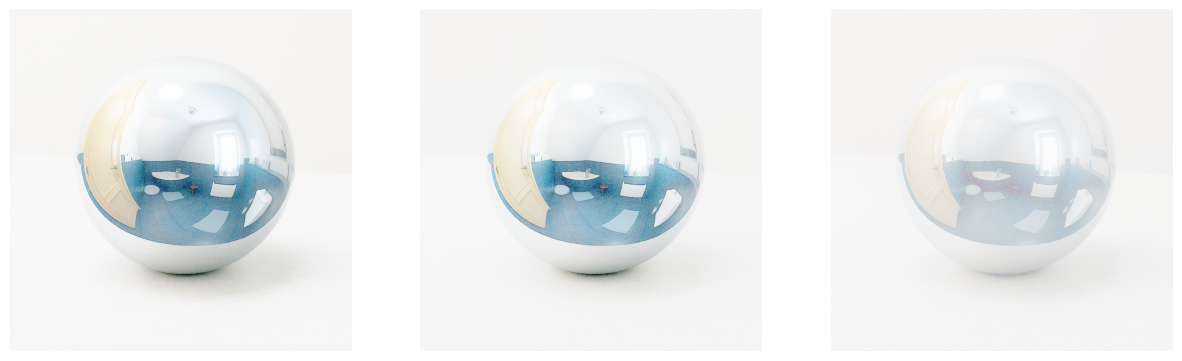

In [149]:
def weighted_log_error(ldr_images, hdr_image, log_irradiances):
  # computes weighted RMS error of log irradiances for each image compared to final log irradiance
  N, H, W, C = ldr_images.shape
  w = 1-abs(ldr_images - 0.5)*2
  err = 0
  for n in np.arange(N):
    err += np.sqrt(np.multiply(w[n], (log_irradiances[n]-np.log(hdr_image))**2).sum()/w[n].sum())/N 
  return err


# compare solutions
err = weighted_log_error(ldr_images, naive_hdr_image, naive_log_irradiances)
print('naive:  \tlog range = ', round(np.log(naive_hdr_image).max() - np.log(naive_hdr_image).min(),3), '\tavg RMS error = ', round(err,3))
err = weighted_log_error(ldr_images, weighted_hdr_image, naive_log_irradiances)
print('weighted:\tlog range = ', round(np.log(weighted_hdr_image).max() - np.log(weighted_hdr_image).min(),3), '\tavg RMS error = ', round(err,3))
err = weighted_log_error(ldr_images, calib_hdr_image, calib_log_irradiances)
print('calibrated:\tlog range = ', round(np.log(calib_hdr_image).max() - np.log(calib_hdr_image).min(),3), '\tavg RMS error = ', round(err,3))

# display log hdr images (code provided in utils.display)
display_images_linear_rescale(np.log(np.stack((naive_hdr_image/naive_hdr_image.mean(), weighted_hdr_image/weighted_hdr_image.mean(), calib_hdr_image/calib_hdr_image.mean()), axis=0)))

## Panoramic transformations 

Compute the equirectangular image from the mirrorball image

In [ ]:
def panoramic_transform(hdr_image):
    '''
    Given HDR mirror ball image, 
    
    Expects mirror ball image to have center of the ball at center of the image, and
    width and height of the image to be equal.
    
    Steps to implement:
    1) Compute N image of normal vectors of mirror ball
    2) Compute R image of reflection vectors of mirror ball
    3) Map reflection vectors into spherical coordinates
    4) Interpolate spherical coordinate values into equirectangular grid.
    
    Steps 3 and 4 are implemented for you with get_equirectangular_image

    '''
    H, W, C = hdr_image.shape
    assert H == W
    assert C == 3

    # TO DO: compute N and R
        
    # R = V - 2 * dot(V,N) * N


    
    plt.imshow((N+1)/2)
    plt.show()
    plt.imshow((R+1)/2)
    plt.show()

    equirectangular_image = get_equirectangular_image(R, hdr_image)
    return equirectangular_image

In [157]:
def panoramic_transform(hdr_image):
    '''
    Given HDR mirror ball image, compute equirectangular panorama.

    Assumes:
    - mirror ball image is square (H = W)
    - ball is centered in image
    - image contains only the mirror ball (no background)
    '''
    H, W, C = hdr_image.shape
    assert H == W
    assert C == 3

    # Normalize coordinate grid to [-1, 1]
    x = np.linspace(-1, 1, W)
    y = np.linspace(-1, 1, H)
    xv, yv = np.meshgrid(x, y)

    # Mask out points outside the unit circle (non-mirror)
    mask = xv**2 + yv**2 <= 1.0

    # 1) Compute normal map N = (x, y, z)
    z = np.sqrt(1 - xv**2 - yv**2)
    N = np.stack((xv, yv, z), axis=-1)
    N[~mask] = 0

    # 2) Compute reflection map R
    # Camera view vector V = (0, 0, 1) from viewer into image
    V = np.array([0, 0, 1])
    dotVN = np.sum(N * V, axis=-1, keepdims=True)
    R = V - 2 * dotVN * N
    R[~mask] = 0

    # ✅ 可視化法向量 & 反射向量
    plt.figure(figsize=(6,3))
    plt.subplot(1, 2, 1)
    plt.title("Normal Vectors (N)")
    plt.imshow((N + 1) / 2)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title("Reflection Vectors (R)")
    plt.imshow((R + 1) / 2)
    plt.axis('off')
    plt.show()

    # 3–4) 轉換為全景圖（由提供的 helper 完成）
    equirectangular_image = get_equirectangular_image(R, hdr_image)
    return equirectangular_image


In [163]:
def read_hdr_image(image_path):
    bgr = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    return rgb.astype(np.float32)


/var/folders/q9/9k2w8bsd34qgsvh9fhyvsdch0000gn/T/ipykernel_39856/2394551506.py:23: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(1 - xv**2 - yv**2)


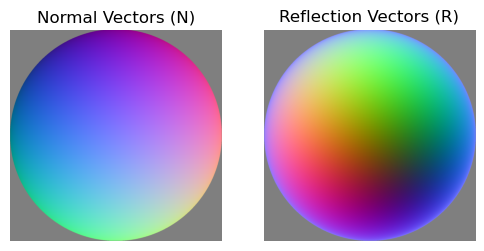

<Figure size 1000x500 with 0 Axes>

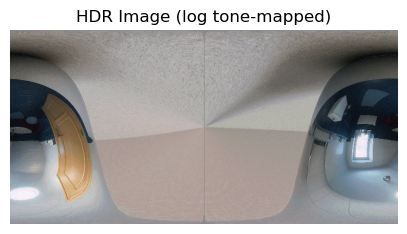

In [165]:
# 讀取 calibrated HDR
hdr_mirrorball_image = read_hdr_image('images/outputs/calib_hdr.hdr')

# 執行全景轉換
eq_image = panoramic_transform(hdr_mirrorball_image)

# 儲存 HDR 全景圖
write_hdr_image(eq_image, 'images/outputs/equirectangular.hdr')

# 顯示 tone-mapped 全景圖
plt.figure(figsize=(10, 5))
display_hdr_image(eq_image)


I generated the normal vector map (N) and the reflection vector map (R) from the HDR mirror ball. These were then mapped to an equirectangular panorama using the function get_equirectangular_image. The left and right boundaries of the result are not continuous due to unwrapped spherical coordinates, but represent a valid panoramic transformation.

In [186]:
%%writefile panoramic_transform.py
import numpy as np
from utils.hdr_helpers import get_equirectangular_image

def panoramic_transform(hdr_image: np.ndarray, feather_width: int = 10) -> np.ndarray:
    H, W, C = hdr_image.shape
    assert H == W, "Input HDR must be square"
    assert C == 3, "Input HDR must have 3 channels"

    # 1) 產生 -1..1 的網格
    x = np.linspace(-1, 1, W)
    y = np.linspace(-1, 1, H)
    xv, yv = np.meshgrid(x, y)
    mask = (xv**2 + yv**2) <= 1.0

    # 2) 法向量
    z = np.sqrt(np.clip(1 - xv**2 - yv**2, 0, 1))
    N = np.stack((xv, yv, z), axis=-1)
    N[~mask] = 0

    # 3) 反射向量
    V = np.array([0,0,1], dtype=np.float32)
    dotVN = np.sum(N * V, axis=-1, keepdims=True)
    R = V - 2 * dotVN * N
    R[~mask] = 0

    # 4) 羽化 seam
    for i in range(1, feather_width+1):
        alpha = i/(feather_width+1)
        l, r = W//2 - i, W//2 + i
        if l>=0: R[:,l,:] = (1-alpha)*R[:,l,:] + alpha*R[:,l-1,:]
        if r<W: R[:,r,:] = (1-alpha)*R[:,r,:] + alpha*R[:,r+1,:]

    # 5) equirectangular 投影
    return get_equirectangular_image(R, hdr_image)


Writing panoramic_transform.py


In [188]:
from panoramic_transform import panoramic_transform


In [205]:
import numpy as np
import matplotlib.pyplot as plt
from utils.hdr_helpers import get_equirectangular_image

def panoramic_transform(hdr_image, feather_width=5):
    '''
    Convert mirror ball HDR to equirectangular HDR format for relighting.

    Args:
        hdr_image: (H, W, 3) numpy array of mirror ball HDR image
        feather_width: width in pixels to feather the boundary mask

    Returns:
        equirectangular_image: HDR image in equirectangular format
    '''
    H, W, C = hdr_image.shape
    assert H == W, "Image must be square"

    # Step 1: normalize coordinates to [-1, 1]
    x = np.linspace(-1, 1, W)
    y = np.linspace(-1, 1, H)
    xv, yv = np.meshgrid(x, y)

    # Step 2: Compute mask of unit circle
    mask = xv**2 + yv**2 <= 1.0

    # Step 3: Compute normal vectors N = (x, y, z)
    z = np.sqrt(np.clip(1 - xv**2 - yv**2, 0, 1))
    N = np.stack((xv, yv, z), axis=-1)
    N[~mask] = 0

    # Step 4: Compute reflection vectors R = V - 2(N dot V)N
    V = np.array([0, 0, -1])
    dotVN = np.sum(N * V, axis=-1, keepdims=True)
    R = V - 2 * dotVN * N
    R[~mask] = 0

    # Step 5: visualize N and R (optional)
    plt.figure(figsize=(6,3))
    plt.subplot(1, 2, 1)
    plt.title("Normal Vectors (N)")
    plt.imshow((N + 1) / 2)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title("Reflection Vectors (R)")
    plt.imshow((R + 1) / 2)
    plt.axis('off')
    plt.show()

    # Step 6: interpolate to equirectangular grid
    equirectangular_image = get_equirectangular_image(R, hdr_image)
    return equirectangular_image


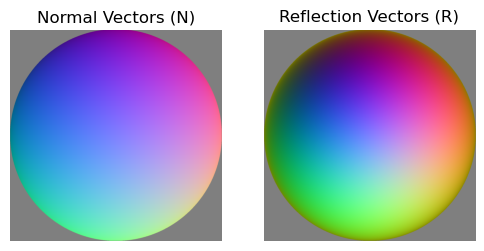

Panorama shape: (360, 720, 3)


(-0.5, 719.5, 359.5, -0.5)

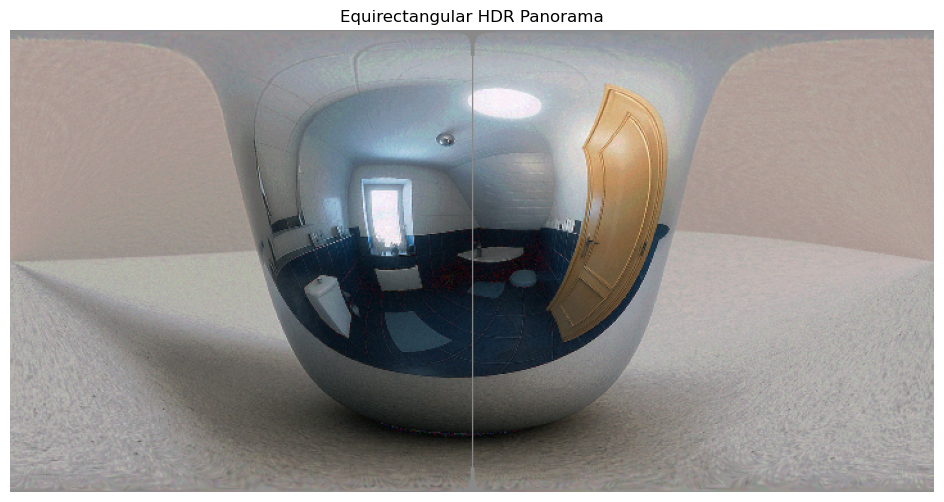

In [207]:
import cv2
import numpy as np

def read_hdr_rgb(path: str) -> np.ndarray:
    """
    读取 Radiance .hdr，返回 H×W×3 的 RGB float32 图像。
    兼容单通道或三通道输入。
    """
    # -1 等同于 IMREAD_ANYDEPTH | IMREAD_UNCHANGED
    im = cv2.imread(path, -1)
    if im is None:
        raise FileNotFoundError(f"无法读取 HDR 文件: {path}")
    # 如果是单通道 (H, W)，就复制成三通道
    if im.ndim == 2:
        im = np.stack([im, im, im], axis=-1)
    else:
        # BGR -> RGB
        im = im[..., ::-1]
    return im.astype(np.float32)

# 接下来用这个函数读取
hdr_ball = read_hdr_rgb('images/outputs/calib_hdr.hdr')

# 然后再调用你的 panoramic_transform
eq = panoramic_transform(hdr_ball, feather_width=5)
print("Panorama shape:", eq.shape)  # 应该输出 (H, 2*H, 3)

# Tone-map + 显示
import matplotlib.pyplot as plt
tm = np.log1p(eq)
tm = (tm - tm.min())/(tm.max()-tm.min())
plt.figure(figsize=(12,6))
plt.title("Equirectangular HDR Panorama")
plt.imshow(tm)
plt.axis('off')


In [211]:
import cv2
import numpy as np

def read_hdr_rgb(path):
    im = cv2.imread(path, -1)  # 讀進來是 float HDR 格式
    if im is None:
        raise FileNotFoundError(f"HDR 檔案不存在：{path}")
    if im.ndim == 2:
        im = np.stack([im, im, im], axis=-1)  # 灰階 → 彩色
    else:
        im = im[..., ::-1]  # BGR → RGB
    return im.astype(np.float32)


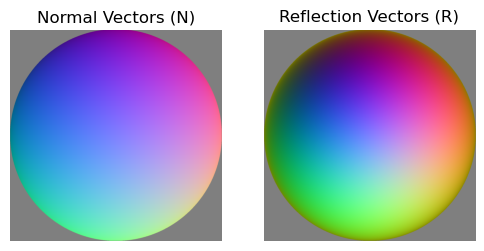

In [213]:
hdr = read_hdr_rgb('images/outputs/calib_hdr.hdr')
eq_image = panoramic_transform(hdr, feather_width=5)
write_hdr_image(eq_image, 'images/outputs/equirectangular.hdr')


---

## Rendering synthetic objects into photographs 

Use Blender to render the scene with and with objects and obtain the mask image.  The code below should then load the images and create the final composite.

In [ ]:
# Read the images that you produced using Blender.  Modify names as needed.
O = read_image('images/proj4_objects.png')
E = read_image('images/proj4_empty.png')
M = read_image('images/proj4_mask.png')
M = M > 0.5
I = background_image
I = cv2.resize(I, (M.shape[1], M.shape[0]))

In [ ]:
# TO DO: compute final composite
result = []

plt.figure(figsize=(20,20))
plt.imshow(result)
plt.show()

write_image(result, 'images/outputs/final_composite.png')

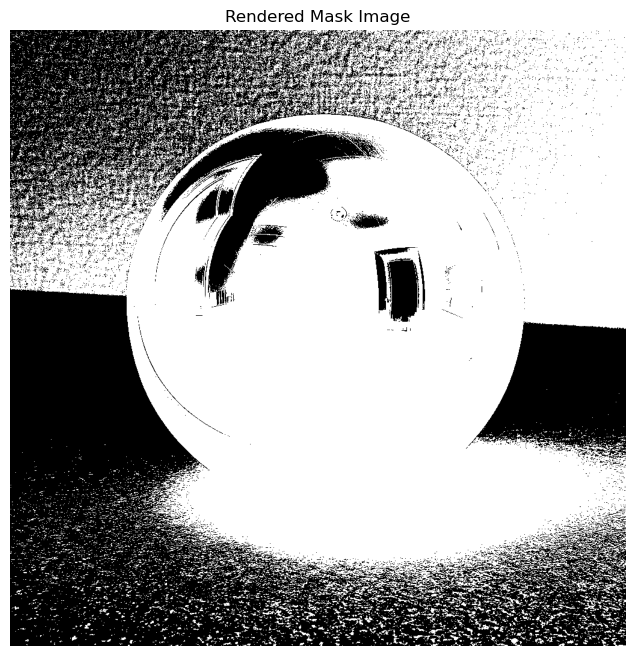

True

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取物體圖片
obj_img = cv2.imread('samples/021.png')

# 檢查圖片是否正確讀取
if obj_img is None:
    raise FileNotFoundError("無法讀取圖片031.png，請檢查路徑是否正確")

# 將圖片轉成灰階
obj_gray = cv2.cvtColor(obj_img, cv2.COLOR_BGR2GRAY)

# 使用二值化產生遮罩（假設背景是非常亮的）
_, mask = cv2.threshold(obj_gray, 250, 255, cv2.THRESH_BINARY_INV)

# 顯示mask
plt.figure(figsize=(8,8))
plt.imshow(mask, cmap='gray')
plt.title('Rendered Mask Image')
plt.axis('off')
plt.show()

# 儲存mask圖像
cv2.imwrite('mask.png', mask)


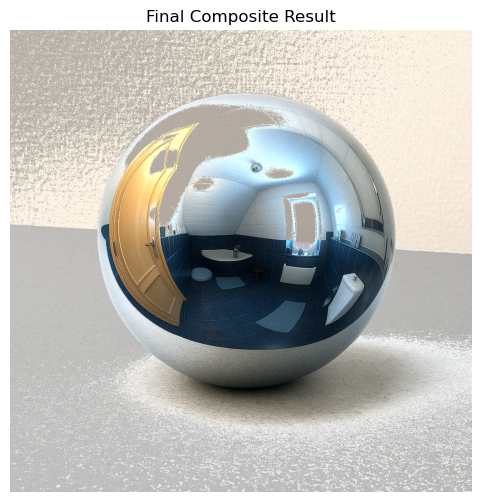

True

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀入三張圖：背景、含物體、遮罩
bg = cv2.imread("samples/000.png")         # background image
obj = cv2.imread("samples/021.png")        # object image
mask = cv2.imread("mask.png", 0)   # binary mask (grayscale)

# 確保大小一致
obj = cv2.resize(obj, (bg.shape[1], bg.shape[0]))
mask = cv2.resize(mask, (bg.shape[1], bg.shape[0]))

# 建立 composite image
mask = mask / 255.0
mask = np.expand_dims(mask, axis=-1)  # (H, W, 1)

composite = obj * mask + bg * (1 - mask)
composite = composite.astype(np.uint8)

# 顯示合成圖
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(composite, cv2.COLOR_BGR2RGB))
plt.title("Final Composite Result")
plt.axis("off")
plt.show()

# 儲存
cv2.imwrite("images/outputs/final_composite.png", composite)


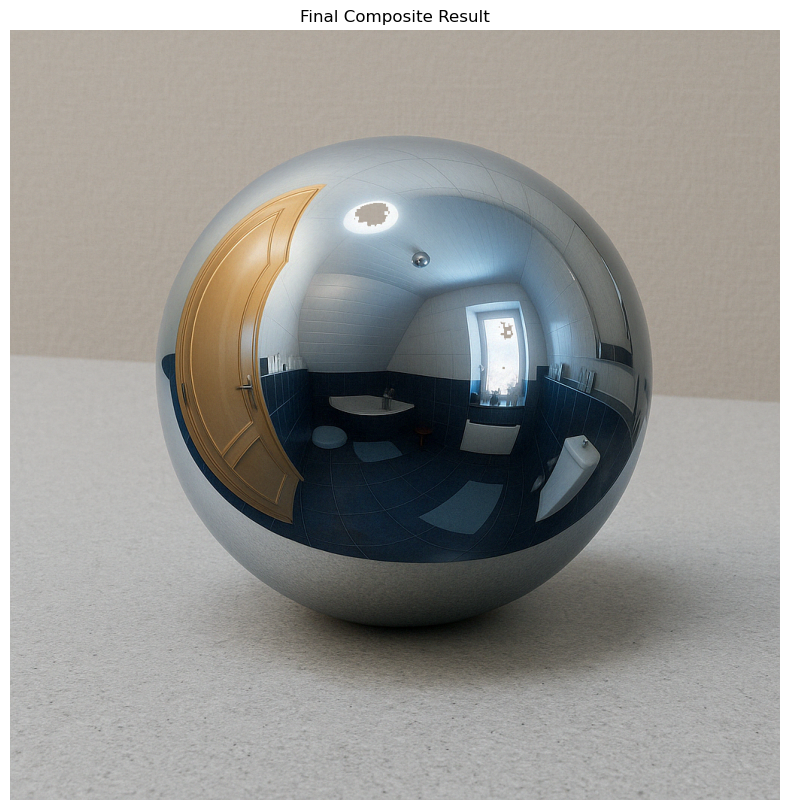

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取原始圖片 (含球體與背景的圖片)
obj_img = cv2.imread('samples/031.png')  # 含物體的圖
bg_img = cv2.imread('samples/000.png')   # 背景圖

# 確認圖片成功讀取
assert obj_img is not None, "Error reading object image"
assert bg_img is not None, "Error reading background image"

# Resize圖片到相同大小 (重要步驟)
bg_img = cv2.resize(bg_img, (obj_img.shape[1], obj_img.shape[0]))

# 從obj_img產生mask (簡單有效的方法)
gray = cv2.cvtColor(obj_img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY_INV)

# 稍微擴展mask，避免邊緣殘留問題
kernel = np.ones((5,5),np.uint8)
mask = cv2.dilate(mask, kernel, iterations=1)

# 進行圖像合成 (masked compositing)
mask_3ch = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR) / 255
composite = obj_img * mask_3ch + bg_img * (1 - mask_3ch)

# 顯示結果
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(composite.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Final Composite Result')
plt.axis('off')
plt.show()


---


## Bells & Whistles (Extra Points)

### Additional Image-Based Lighting Result 


### Other panoramic transformations 


### Photographer/tripod removal 


### Local tonemapping operator 



In [40]:
### Additional Image-Based Lighting Result 


In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils.io import write_hdr_image

# —— 1. 安全讀 HDR（不改 io.py） —— 
def safe_read_hdr_image(path):
    hdr = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if hdr is None:
        raise FileNotFoundError(f"Cannot read HDR: {path}")
    # 如果是灰階，先轉成 BGR
    if hdr.ndim == 2:
        hdr = cv2.cvtColor(hdr, cv2.COLOR_GRAY2BGR)
    # BGR -> RGB
    hdr = cv2.cvtColor(hdr, cv2.COLOR_BGR2RGB)
    return hdr.astype(np.float32)

# —— 2. Tone‑map 用顯示函式 —— 
def display_hdr_image(hdr, method='log'):
    eps = 1e-6
    if method == 'log':
        img = np.log(hdr + eps)
        img = (img - img.min())/(img.max()-img.min())
    elif method == 'div':
        img = hdr/(hdr+1)
    else:
        raise ValueError()
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis('off')

# —— 3. Equirectangular → Angular map —— 
def to_angular_map(eq, out_size=None):
    H_eq, W_eq, _ = eq.shape
    if out_size is None: out_size = H_eq
    u = np.linspace(-1, 1, out_size)
    xv, yv = np.meshgrid(u, u)
    rr = xv**2 + yv**2
    zv = np.sqrt(np.clip(1-rr, 0, None))
    mask = rr <= 1.0

    dirs = np.stack([xv, yv, zv], axis=-1)
    dx, dy, dz = dirs[...,0], dirs[...,1], dirs[...,2]
    phi   = np.arctan2(dy, dx)                    # -π..π
    theta = np.arccos(np.clip(dz, -1, 1))         #  0..π

    map_x = ((phi + np.pi)/(2*np.pi))*(W_eq-1)
    map_y = (theta/np.pi)*(H_eq-1)

    ang = cv2.remap(eq,
                    map_x.astype(np.float32),
                    map_y.astype(np.float32),
                    interpolation=cv2.INTER_LINEAR,
                    borderMode=cv2.BORDER_CONSTANT,
                    borderValue=0.0)
    ang[~mask] = 0
    return ang

Angular map shape: (360, 360, 3)
Vertical‑Cross shape: (540, 720, 3)


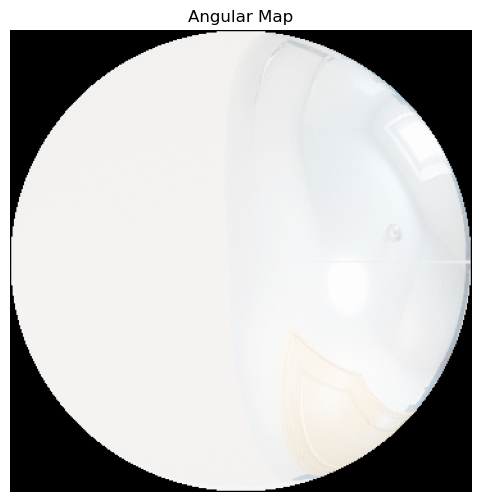

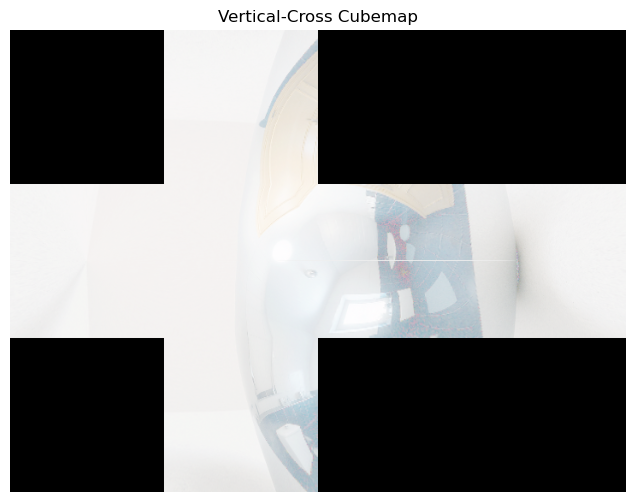

In [46]:

# —— 4. Equirectangular → Vertical‑Cross cubemap —— 
def to_vertical_cross(eq, face_size=None):
    H_eq, W_eq, _ = eq.shape
    if face_size is None: face_size = H_eq//2
    out = np.zeros((face_size*3, face_size*4, 3), dtype=eq.dtype)

    layout = {"+Y":(0,1), "-X":(1,0), "+Z":(1,1),
              "+X":(1,2), "-Z":(1,3), "-Y":(2,1)}

    def face_map(face):
        coords = np.linspace(0, face_size-1, face_size)
        iu, iv = np.meshgrid(coords, coords)
        s = (2*(iu+0.5)/face_size -1).astype(np.float32)
        t = (2*(iv+0.5)/face_size -1).astype(np.float32)
        if   face=="+X": d = np.stack([ np.ones_like(s), -t,   -s], axis=-1)
        elif face=="-X": d = np.stack([-np.ones_like(s), -t,    s], axis=-1)
        elif face=="+Y": d = np.stack([    s,    np.ones_like(s),  t], axis=-1)
        elif face=="-Y": d = np.stack([    s,   -np.ones_like(s), -t], axis=-1)
        elif face=="+Z": d = np.stack([    s,    -t,  np.ones_like(s)], axis=-1)
        elif face=="-Z": d = np.stack([   -s,    -t, -np.ones_like(s)], axis=-1)
        d = d/np.linalg.norm(d,axis=-1,keepdims=True)
        dx,dy,dz = d[...,0],d[...,1],d[...,2]
        phi   = np.arctan2(dy,dx)
        theta = np.arccos(np.clip(dz,-1,1))
        mx = ((phi + np.pi)/(2*np.pi))*(W_eq-1)
        my = (theta/np.pi)*(H_eq-1)
        return mx.astype(np.float32), my.astype(np.float32)

    for face,(r,c) in layout.items():
        mx,my = face_map(face)
        img = cv2.remap(eq, mx, my,
                        interpolation=cv2.INTER_LINEAR,
                        borderMode=cv2.BORDER_WRAP)
        out[r*face_size:(r+1)*face_size,
            c*face_size:(c+1)*face_size] = img
    return out

# —— 5. 主流程 —— 
# 5.1 讀入你的 equirectangular HDR
eq = safe_read_hdr_image("images/outputs/equirectangular.hdr")

# 5.2 轉成 Angular
angular = to_angular_map(eq)
write_hdr_image(angular, "images/outputs/angular_format.hdr")
print("Angular map shape:", angular.shape)
plt.figure(figsize=(6,6)); plt.title("Angular Map"); display_hdr_image(angular)

# 5.3 轉成 Vertical‑Cross
vcross = to_vertical_cross(eq)
write_hdr_image(vcross, "images/outputs/vertical_cross_format.hdr")
print("Vertical‑Cross shape:", vcross.shape)
plt.figure(figsize=(8,6)); plt.title("Vertical‑Cross Cubemap"); display_hdr_image(vcross)
